# Instalar librerias

In [ ]:
import numpy as np
from IPython.display import display, Latex
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from scipy import signal
#from scipy import fftpack
from importlib import reload
from scipy import stats

#PARA LAS SEÑALES DE MATLAB
import scipy.io as sio

import csv

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import svm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant
import re

import math as mt

#import itertools

#from gapminder import gapminder

from pprint import pprint

import seaborn as sn

from itertools import combinations,product

from imageio import imread, imwrite
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.cluster.hierarchy as hierarchy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Montar drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preparación de datos

In [ ]:
path = "/content/drive/Shareddrives/Machine Learning/TP4/acath.xls"
datos_totales = pd.read_excel(path)
datos_totales.info() #Nos fijamos que todos los atributos tengan la misma cantidad de datos no nulos

*** No CODEPAGE record, no encoding_override: will use 'ascii'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       3504 non-null   int64  
 1   age       3504 non-null   int64  
 2   cad.dur   3504 non-null   int64  
 3   choleste  2258 non-null   float64
 4   sigdz     3504 non-null   int64  
 5   tvdlm     3501 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 164.4 KB


In [ ]:
datos_totales.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
0,0,73,132,268.0,1,1.0
1,0,68,85,120.0,1,1.0
2,0,54,45,NaN,1,0.0
3,1,58,86,245.0,0,0.0
4,1,56,7,269.0,0,0.0


observar el tipo de datos
observar si hay NAN


In [ ]:
# se dividen los datos en masculino y femenino, usando sex como factor. df_nan[df_nan['sex']==1]
datos_fem = datos_totales[datos_totales['sex']==1]
datos_masc = datos_totales[datos_totales['sex']==0]
print('Observar si hay NAN en fem')
print(datos_fem.info())
print()
print('Observar si hay NAN en masc')
print(datos_masc.info())

Observar si hay NAN en fem
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099 entries, 3 to 3502
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1099 non-null   int64  
 1   age       1099 non-null   int64  
 2   cad.dur   1099 non-null   int64  
 3   choleste  689 non-null    float64
 4   sigdz     1099 non-null   int64  
 5   tvdlm     1097 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 60.1 KB
None

Observar si hay NAN en masc
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2405 entries, 0 to 3503
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       2405 non-null   int64  
 1   age       2405 non-null   int64  
 2   cad.dur   2405 non-null   int64  
 3   choleste  1569 non-null   float64
 4   sigdz     2405 non-null   int64  
 5   tvdlm     2404 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 131.5 KB


Como vamos a usar 'sex' como factor los nan de colesterol los vamos a poner el valor de la variable 'choleste' segun si son masculinos o femeninos. Se completan los datos con la moda. 

In [ ]:
moda_fem_choleste = datos_fem['choleste'].mode()[0]
moda_masc_choleste = datos_masc['choleste'].mode()[0]
moda_fem_tvdlm = datos_fem['tvdlm'].mode()[0]
moda_masc_tvdlm = datos_masc['tvdlm'].mode()[0]

In [ ]:
datos_fem['choleste'] = datos_fem['choleste'].fillna(moda_fem_choleste)
datos_fem['tvdlm'] = datos_fem['tvdlm'].fillna(moda_fem_tvdlm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
datos_masc['choleste'] = datos_masc['choleste'].fillna(moda_masc_choleste)
datos_masc['tvdlm'] = datos_masc['tvdlm'].fillna(moda_masc_tvdlm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
datos_masc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2405 entries, 0 to 3503
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       2405 non-null   int64  
 1   age       2405 non-null   int64  
 2   cad.dur   2405 non-null   int64  
 3   choleste  2405 non-null   float64
 4   sigdz     2405 non-null   int64  
 5   tvdlm     2405 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 131.5 KB


In [ ]:
datos_totales[datos_totales['sex']==1] = datos_fem
datos_totales[datos_totales['sex']==0] = datos_masc
datos_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       3504 non-null   int64  
 1   age       3504 non-null   int64  
 2   cad.dur   3504 non-null   int64  
 3   choleste  3504 non-null   float64
 4   sigdz     3504 non-null   int64  
 5   tvdlm     3504 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 164.4 KB


## Conjunto de entrenamiento y testeo

In [ ]:
size_test1= 0.3
test1,train1 = train_test_split(datos_totales, train_size = size_test1, random_state = 2) #data es mi conjunto de entrenamiento

# Regresion logistica




sigdz ~ suma de las otras variables
hacer summary del modelo

Las hipótesis del test para los coeficientes de regresión son:
* $H_0$: $\beta_i = 0$ con $ i = 0,\,1,\,2$
* $H_1$: $\beta_i \not = 0$ con $ i = 0,\,1,\,2$

In [ ]:
def regresionLogistica(X,y,X_test):
  model = Logit(y,add_constant(X)).fit()
  pred = (model.predict(add_constant(X_test))>0.5).astype(int)
  coef = model.params
  pvalue_ = model.pvalues
  coef_ = []
  for i in range(len(pvalue_)):
    if pvalue_[i]<0.05: # si el p-value de la variable es menor a 0.05 entonces B<>0 => estadisticamente significativa
      coef_.append([pvalue_.index[i], coef[i]])
      print(pvalue_.index[i], 'es estadisticamente significativa porque el p-value es mayor a 0.05, siendo este: ',pvalue_[i])
      print()
    else:
      print(pvalue_.index[i], 'no es estadisticamente significativa porque el p-value es menor a 0.05')
      print()

  return model, pred, coef_

## Modelo de regresion logistica a partir de variables numericas

Las variables continuas son las 'age', 'choleste' y 'duracion'.


  * $\text{logit}(p) = \beta_0 + \beta_{\text{age}}\cdot \text{age} + \beta_{\text{cad_dur}}\cdot \text{cad_dur} + \beta_{\text{choleste}}\cdot \text{choleste}$

* $\text{logit}(p) = \ln(\frac{p}{1-p})$


In [ ]:
y_train1 = train1['sigdz']
x_train1 = train1.drop(['sigdz', 'sex', 'tvdlm'],axis=1) 

In [ ]:
y_test1 = test1['sigdz']
x_test1 = test1.drop(['sigdz', 'sex', 'tvdlm'],axis=1) 

In [ ]:
modelo1, prediccion1, coef1 = regresionLogistica(x_train1,y_train1,x_test1)
summary1 = modelo1.summary()
print(summary1)

Optimization terminated successfully.
         Current function value: 0.603730
         Iterations 5
const es estadisticamente significativa porque el p-value es mayor a 0.05, siendo este:  1.0980523425742735e-23

age es estadisticamente significativa porque el p-value es mayor a 0.05, siendo este:  4.493317301515454e-31

cad.dur no es estadisticamente significativa porque el p-value es menor a 0.05

choleste es estadisticamente significativa porque el p-value es mayor a 0.05, siendo este:  2.77410354732313e-07

                           Logit Regression Results                           
Dep. Variable:                  sigdz   No. Observations:                 2453
Model:                          Logit   Df Residuals:                     2449
Method:                           MLE   Df Model:                            3
Date:                Wed, 23 Jun 2021   Pseudo R-squ.:                 0.06209
Time:                        12:44:11   Log-Likelihood:                -1480.9
converg

Se consideran los siguientes puntos:
* $\beta_i \, \rightarrow$ corresponde a la variable i $\rightarrow$ si p-value es menor que 0.05, se rechaza la hipótesis nula y se acepta la alternativa. Entonces se inferie que $\beta_i = $ coeficiente de la variable i. Caso contrario $\beta_i = 0$

donde i es 'Intercept' para la constante, 'age', 'cad.dur' y 'choleste'.

Hay una asociación estadísticamente significativa de la variable que posee $p-value<0.05$ en el modelo. Por lo que, debe ser incluida en el mismo y el coeficiente correspondiente es estadísticamente significativo. Mientras que, se observa que la variables que tienen $p-value>0.05$ no tienen asociación estadísticamente significativa en el modelo. Las variables no deben ser incluidas en el modelo y el coeficiente $\beta$ correspondiente no resulta estadísticamente significativo. 


### Matriz de confusion

In [ ]:
def matrizConfusion(clases,prediccion,real):#Calculamos la matriz de confusion columna predicho, fila real
  matriz_confusion = pd.DataFrame(columns = clases,index = clases)
  matriz_confusion = matriz_confusion.fillna(0)

  for i in range(0,len(real)):
    matriz_confusion.iloc[real.iloc[i],prediccion.iloc[i]] += 1
  
  return matriz_confusion

In [ ]:
head = ['No enfermo', 'Enfermo']
matriz = matrizConfusion(head,prediccion1,y_test1)
matriz

,No enfermo,Enfermo
No enfermo,80,246
Enfermo,68,657


In [ ]:
fig = px.scatter_3d(test1, x='age', y='cad.dur', z='choleste',
              color='sigdz', opacity=1,title="Datos de testeo originales")
fig.show()

In [ ]:
datos_ = test1.copy()
datos_["prediccion"] = prediccion1

fig = px.scatter_3d(datos_, x='age', y='cad.dur', z='choleste',
              color='prediccion', opacity=1,title="Regresion logistica")
fig.show()

## Regresion Logistica para 'sex' como factor


In [ ]:
train_fem = train1[train1['sex'] ==1]
test_fem = test1[test1['sex'] ==1]

train_masc = train1[train1['sex'] ==0]
test_masc = test1[test1['sex'] ==0]

### Femenino


In [ ]:
y_train_fem = train_fem['sigdz']
x_train_fem = train_fem.drop(['sigdz', 'sex', 'tvdlm'],axis=1) 

In [ ]:
y_test_fem = test_fem['sigdz']
x_test_fem = test_fem.drop(['sigdz', 'sex', 'tvdlm'],axis=1) 

In [ ]:
modelo_fem, prediccion_fem, coef_fem = regresionLogistica(x_train_fem,y_train_fem,x_test_fem)
summary_fem = modelo_fem.summary()
print(summary_fem)

Optimization terminated successfully.
         Current function value: 0.613578
         Iterations 5
const es estadisticamente significativa porque el p-value es mayor a 0.05, siendo este:  4.519865751660555e-21

age es estadisticamente significativa porque el p-value es mayor a 0.05, siendo este:  3.991730228336024e-17

cad.dur no es estadisticamente significativa porque el p-value es menor a 0.05

choleste es estadisticamente significativa porque el p-value es mayor a 0.05, siendo este:  1.0049428357141882e-05

                           Logit Regression Results                           
Dep. Variable:                  sigdz   No. Observations:                  790
Model:                          Logit   Df Residuals:                      786
Method:                           MLE   Df Model:                            3
Date:                Wed, 23 Jun 2021   Pseudo R-squ.:                 0.09763
Time:                        12:44:13   Log-Likelihood:                -484.73
conver

#### Matriz de confusion


In [ ]:
head = ['No enfermo', 'Enfermo']
matriz = matrizConfusion(head,prediccion_fem,y_test_fem)
matriz

,No enfermo,Enfermo
No enfermo,136,42
Enfermo,73,58


### Masculino

In [ ]:
y_train_masc = train_masc['sigdz']
x_train_masc = train_masc.drop(['sigdz', 'sex', 'tvdlm'],axis=1) 

In [ ]:
y_test_masc = test_masc['sigdz']
x_test_masc = test_masc.drop(['sigdz', 'sex', 'tvdlm'],axis=1) 

In [ ]:
modelo_masc, prediccion_masc, coef_masc = regresionLogistica(x_train_masc,y_train_masc,x_test_masc)
summary_masc = modelo_masc.summary()
print(summary_masc)

Optimization terminated successfully.
         Current function value: 0.477467
         Iterations 6
const es estadisticamente significativa porque el p-value es mayor a 0.05, siendo este:  6.129454309593295e-22

age es estadisticamente significativa porque el p-value es mayor a 0.05, siendo este:  5.572576449383887e-31

cad.dur no es estadisticamente significativa porque el p-value es menor a 0.05

choleste es estadisticamente significativa porque el p-value es mayor a 0.05, siendo este:  1.8787095125471098e-08

                           Logit Regression Results                           
Dep. Variable:                  sigdz   No. Observations:                 1663
Model:                          Logit   Df Residuals:                     1659
Method:                           MLE   Df Model:                            3
Date:                Wed, 23 Jun 2021   Pseudo R-squ.:                  0.1176
Time:                        12:44:13   Log-Likelihood:                -794.03
conver

#### Matriz de confusion


In [ ]:
head = ['No enfermo', 'Enfermo']
matriz = matrizConfusion(head,prediccion_masc,y_test_masc)
matriz

,No enfermo,Enfermo
No enfermo,31,117
Enfermo,13,581


## Probabilidad


Se calculo la probabilidad sin tener en cuenta el sexo de la persona


In [ ]:
# tomo los coeficientes del modelo1 que son estadisticamente significativos
coef1

[['const', -3.5184958587903647],
 ['age', 0.05688914894356572],
 ['choleste', 0.00543375970677125]]

Se pide calcular la probabilidad de estrechamiento arterial para una persona que:

* colesterol = 199
* edad = 60
* duracion = 2 

Pero como vimos que la variable duracion no tiene significancia estadistica, no se tiene en cuenta. Por lo que el estrechamiento arterial de la persona esta determinada por los demas factores.

$persona = [constante, edad, colesterol]$

  * $\text{logit}(p) = \beta_0 + \beta_{\text{age}}\cdot \text{age} + \beta_{\text{choleste}}\cdot \text{choleste}$

* $\text{logit}(p) = \ln(\frac{p}{1-p})$

In [ ]:
persona = [1, 60, 199]
logit_p = 0
for i in range(len(persona)):
  logit_p += coef1[i][1]*persona[i]

prob = np.exp(logit_p)/(1+np.exp(logit_p))
print('La probabilidad de que una persona tenga estrechamiento con las caracteristicas dadas es de', prob)

La probabilidad de que una persona tenga estrechamiento con las caracteristicas dadas es de 0.726347850292672


#K-means

In [ ]:
def calcular_centroides(data,k):
  centroides = []
  for i in range(k):#recorro las clases
    data_aux = data.loc[data["clases"]==i].drop("clases",axis=1)
    centroide_i = []

    for j in data_aux.columns:#recorro los atributos
      centroide_i.append(data_aux[j].mean())

    centroides.append(centroide_i)

  return centroides

In [ ]:
def asignar_clases(data,centroides):
  clases = []
  
  for i in range(len(data)):#recorro observaciones
    distancia_i = []
    for j in centroides:#recorro centroides
      distancia_j = 0
      #calcular distancia euclidea al centroide j
      for k in range(len(data.columns)-1):
        distancia_j += (data.iloc[i,k]-j[k])**2
      distancia_i.append(distancia_j)
    clase_nueva = distancia_i.index(min(distancia_i))
    clases.append(clase_nueva)

  return clases

In [ ]:
def k_means(data_original,k,p=0.0001,max_iter = 1000,matriz_conf = False,graficar = False):#datos = age	cad.dur	choleste
  #asignar clase aleatoria a las observaciones
  data = data_original.copy()
  data = data.drop('sigdz',axis=1)

  clases = np.random.randint(0,k,size=len(data))
  data["clases"] = clases

  centroides_nuevos = np.zeros(k,dtype=int)
  centroides_viejos = np.ones(k,dtype=int)
  contador = 0
  diferencia = np.ones(k,dtype=int)*2

  #iterando hasta que centroides nuevos = centroides viejos o llegue al numero max de iteraciones
  while np.all(diferencia>p) and (contador<max_iter):
    #guardar centroides actuales para comprar
    centroides_viejos = centroides_nuevos
    #calcular nuevos centroides
    centroides_nuevos = calcular_centroides(data,k)
    #asignar nuevas clases a las observaciones (segund d euclidea con los nuevos centroides)
    data["clases"] = asignar_clases(data,centroides_nuevos)
    contador += 1
    diferencia = np.array([abs(np.array(e1) - np.array(e2)) for e1, e2 in zip(centroides_nuevos,centroides_viejos)])

  if graficar:
    #datos originales
    df_graph = pd.DataFrame(data=data_original,index= np.linspace(0,len(data_original)-1,num= len(data_original)).astype(int),columns=['age', 'cad.dur', 'choleste','sigdz'])  
    df_graph['sigdz real'] = 0
    df_graph.loc[df_graph['sigdz'] == 0, 'sigdz real'] = 'No enfermo'
    df_graph.loc[df_graph['sigdz'] == 1, 'sigdz real'] = 'Enfermo'

    fig = px.scatter_3d(df_graph, x='age', y='cad.dur', z='choleste',
                  color='sigdz real', opacity=1,title="Datos originales")
    fig.show()
    print()
    #datos con k_means
    df_graph = pd.DataFrame(data=data,index= np.linspace(0,len(data)-1,num= len(data)).astype(int),columns=['age', 'cad.dur', 'choleste','clases'])  
    df_graph['sigdz predicho'] = 0
    df_graph.loc[df_graph['clases'] == 0, 'sigdz predicho'] = '0'
    df_graph.loc[df_graph['clases'] == 1, 'sigdz predicho'] = '1'

    fig = px.scatter_3d(df_graph, x='age', y='cad.dur', z='choleste',
                  color='sigdz predicho', opacity=1,title="K-means")
    fig.show()    

  if matriz_conf:
    #calculo las matrices de confusion
    head = ['No Enfermo','Enfermo']
    matriz_k_means1 = matrizConfusion(head,data["clases"],data_original["sigdz"])

    data_k_means2 = data.copy()
    data_k_means2.loc[data_k_means2["clases"]==1,"clases"]=2
    data_k_means2.loc[data_k_means2["clases"]==0,"clases"]=1
    data_k_means2.loc[data_k_means2["clases"]==2,"clases"]=0
    matriz_k_means2 = matrizConfusion(head,data_k_means2["clases"],data_original["sigdz"])
    return data,centroides_nuevos,matriz_k_means1,matriz_k_means2
  else:
    return data,centroides_nuevos

In [ ]:
data_= datos_totales.drop(['sex','tvdlm'],axis=1)
k=2
data_k_means,centroides_nuevos,matriz_k_means1,matriz_k_means2 = k_means(data_,k,matriz_conf = True,graficar = True)

In [ ]:
data_k_means

,age,cad.dur,choleste,clases
0,73,132,268.0,1
1,68,85,120.0,0
2,54,45,190.0,0
3,58,86,245.0,1
4,56,7,269.0,0
...,...,...,...,...
3499,58,14,295.0,0
3500,71,27,200.0,0
3501,67,11,190.0,0
3502,66,247,200.0,1


In [ ]:
matriz_k_means1

,No Enfermo,Enfermo
No Enfermo,1011,159
Enfermo,1878,456


In [ ]:
matriz_k_means2

,No Enfermo,Enfermo
No Enfermo,159,1011
Enfermo,456,1878


In [ ]:
def metodo_codo(data,max_k=10,p=0.0001,max_iter = 1000):
  WSS = []
  k_vec = []

  #variamos el k de 1 a max_k que es el parametro ingresado
  for k in range(1,max_k+1):
    #hacemos k means para ese k
    data_k_means,centroides_nuevos = k_means(data,k,p,max_iter)
    #incializamos WSS_k que representa la distancia de los registros dentro de un cluster
    WSS_k = 0
    #sacamos la columna clases predichas de la tabla que devuelve la funcion de k means
    coordenadas = data_k_means.drop('clases', axis=1)

    #para cada cluster calculamos la distancia
    for i in range(k):
      coordenadas_i = coordenadas.loc[data_k_means['clases']==i]
      for j in range(len(coordenadas_i)):
        WSS_k += ((coordenadas_i.iloc[j,:]-centroides_nuevos[i])**2).sum()
    
    WSS.append(WSS_k) 
    k_vec.append(k)

  plt.figure()
  plt.plot(k_vec,WSS)
  plt.title("Metodo del codo")
  plt.xlabel("K")
  plt.ylabel("WSS")

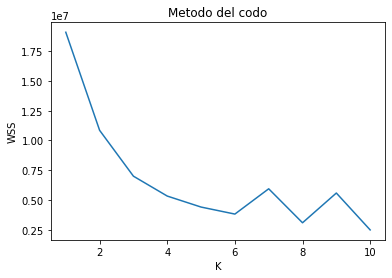

In [ ]:
data_= datos_totales.drop(['sex','tvdlm'],axis=1)
metodo_codo(data_,max_k=10,p=0.00000001,max_iter = 1000)

#Agrupacion Jerarquica

In [ ]:
def minimo_matriz_distancias(data):
  #inicializamos la matriz de distancias
  matriz_d = np.zeros((len(data),len(data)))

  #llenamos la matriz de distancias
  for i in range(len(data)):
    for j in range(len(data)):
      p_i = data.iloc[i,0:len(data.columns)-1]
      p_j = data.iloc[j,0:len(data.columns)-1]
      matriz_d[i][j] = np.sqrt(((p_i-p_j)**2).sum())
  
  #buscamos el maximo de la matriz
  maximo = np.max(matriz_d)
  
  #eliminamos los ceros de la diagonal
  for k in range(len(data)):
    matriz_d[k][k] = 2*maximo
  
  #buscamos el minimo de la matriz
  minimo_d = np.min(matriz_d)

  #identificamos los index de la matriz de distancias del minimo
  index = np.where(matriz_d == minimo_d)
  if len(index[0])==1:
    p1_ = index[0]
    p2_ = index[1]
  else:
    p1_ = index[0][0]
    p2_ = index[0][1]
  
  #identificamos los index de tabla data del minimo
  indexes = data.index

  index_p1 = indexes[p1_]
  index_p2 = indexes[p2_]

  return index_p1,index_p2,minimo_d

In [ ]:
def clasificacion_aj(data_original,matriz_dendograma,grupos_clases):
  clasificacion = data_original.copy()
  clasificacion["clases"] = 0
  
  clase1 = [np.min(grupos_clases)]
  i = 0
  while ~np.all(np.array(clase1) < len(data_original)):
    if clase1[i] >= len(data_original):
      clase1.append(int(matriz_dendograma[clase1[i]-len(data_original)][0]))
      clase1.append(int(matriz_dendograma[clase1[i]-len(data_original)][1]))
      clase1.pop(i)
      i -= 1    
    i += 1

  for j in range(len(clase1)):
    clasificacion.loc[clase1[j],"clases"] = 1
  
  return clasificacion

In [ ]:
def agrupacion_jerarquica(data_original,n_clases, graficar=True):#data solo tiene que tener las caracterisiticas que queremos
  #sacamos la columna de clases
  data = data_original.copy()
  data = data.drop('sigdz',axis=1)
  #inicializamos la matriz para armar finalmente el dendograma
  matriz_dendograma = []
  #agregamos una columna que nos permita medir cuantos registros tiene cada punto
  data["cantidad"] = 1
  contador = len(data)
  #iteramos hasta que hay en la tabla la cantidad de puntos sea 1 para armar el dendograma
  while len(data) != 1:
    #calculamos los puntos de menor distancia p1,p2
    #index p1,p2
    index_p1,index_p2,d_1_2 = minimo_matriz_distancias(data)
    #caracteristicas de p1,p2
    coord_p1 = data.loc[index_p1,data.columns[0:len(data.columns)-1]]
    coord_p2 = data.loc[index_p2,data.columns[0:len(data.columns)-1]]
    #cantidad de registros de p1,p2
    cant_p1 = data.loc[index_p1,data.columns[len(data.columns)-1]]
    cant_p2 = data.loc[index_p1,data.columns[len(data.columns)-1]]

    #calculamos el centroide entre p1 y p2, que va a formar el nuevo punto p3
    centroide_p3 = (coord_p1+coord_p2)/2
    #calculamos la cantidad de registros del nuevo punto p3
    cant_p3 = cant_p1 + cant_p2
    
    #guardamos p3 en la lista
    data.loc[contador,data.columns[0:len(data.columns)-1]] = centroide_p3
    data.loc[contador,data.columns[len(data.columns)-1]] = cant_p3

    #eliminamos p1 y p2 de la lista
    data = data.drop(index_p1)
    data = data.drop(index_p2)

    #agregamos los datos a la matriz para armar el dendograma
    matriz_dendograma.append([index_p1,index_p2,d_1_2,cant_p3])

    contador += 1

    if len(data) == n_clases:
      #guardamos los index de grupos que quedan que van a ser nuestras clases
      grupos_clases = np.array(data.index)
    
  #graficamos el dendograma
  matriz_dendograma = np.array(matriz_dendograma)
  if graficar:
    plt.figure()
    fig, axes = plt.subplots(1, 1, figsize=(15, 10))
    arbol = hierarchy.dendrogram(matriz_dendograma,ax=axes)

  #clasificamos los registros
  clasificacion = clasificacion_aj(data_original,matriz_dendograma,grupos_clases)

  #hacemos las matrices de confusion
  head = ['No enfermo','Enfermo']
  matriz_confusion1 = matrizConfusion(head,clasificacion["clases"],clasificacion["sigdz"])

  clasificacion2 = clasificacion.copy()
  clasificacion2.loc[clasificacion2["clases"]==1,"clases"]=2
  clasificacion2.loc[clasificacion2["clases"]==0,"clases"]=1
  clasificacion2.loc[clasificacion2["clases"]==2,"clases"]=0
  
  matriz_confusion2 = matrizConfusion(head,clasificacion2["clases"],clasificacion2["sigdz"])

  return matriz_dendograma, clasificacion, matriz_confusion1, matriz_confusion2

<Figure size 432x288 with 0 Axes>

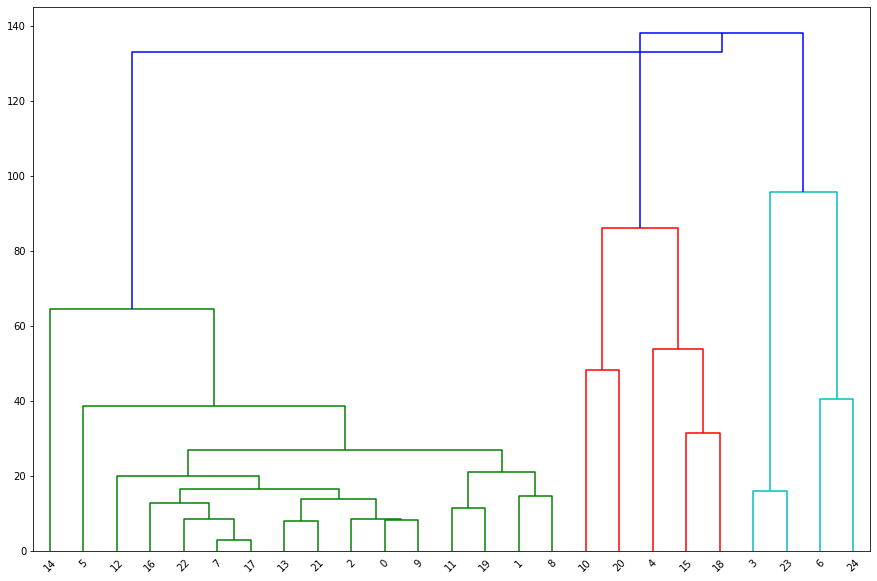

In [ ]:
datos= datos_totales.drop(['sex','tvdlm'], axis=1).sample(n=25)#, random_state = 42
datos.reset_index(inplace=True,drop = True)
n_clases = 2
matriz_dendograma,clasificacion, matriz_confusion1, matriz_confusion2 = agrupacion_jerarquica(datos,n_clases)

In [ ]:
matriz_dendograma

array([[  7.        ,  17.        ,   2.82842712,   2.        ],
       [ 13.        ,  21.        ,   7.87400787,   2.        ],
       [  0.        ,   9.        ,   8.30662386,   2.        ],
       [  2.        ,  27.        ,   8.38152731,   2.        ],
       [ 22.        ,  25.        ,   8.48528137,   2.        ],
       [ 11.        ,  19.        ,  11.35781669,   2.        ],
       [ 16.        ,  29.        ,  12.64911064,   2.        ],
       [ 26.        ,  28.        ,  13.71358815,   4.        ],
       [  1.        ,   8.        ,  14.45683229,   2.        ],
       [  3.        ,  23.        ,  15.93737745,   2.        ],
       [ 31.        ,  32.        ,  16.37881635,   4.        ],
       [ 12.        ,  35.        ,  20.01727769,   2.        ],
       [ 30.        ,  33.        ,  21.01190139,   4.        ],
       [ 36.        ,  37.        ,  26.75381471,   4.        ],
       [ 15.        ,  18.        ,  31.25699922,   2.        ],
       [  5.        ,  38

In [ ]:
clasificacion

,age,cad.dur,choleste,sigdz,clases
0,50,9,188.0,0,1
1,47,18,173.0,0,1
2,45,1,190.0,1,1
3,50,115,185.0,0,0
4,46,3,282.0,0,0
5,43,47,168.0,1,1
6,63,202,220.0,1,0
7,49,14,206.0,1,1
8,40,30,169.0,0,1
9,54,2,190.0,1,1


In [ ]:
matriz_confusion1

,No enfermo,Enfermo
No enfermo,3,8
Enfermo,6,8


In [ ]:
matriz_confusion2

,No enfermo,Enfermo
No enfermo,8,3
Enfermo,8,6


#Redes de Kohonen

In [ ]:
def redes_kohonen(data_original,k,cte=500,eta0=0.1,R0=k,graficar = True):
  data = data_original.copy()
  data = data.drop('sigdz',axis=1)

  #inicializar los pesos con registos random de la data ingresada sin repetir
  pesos = data.sample(n=k*k)

  n = len(data.columns)
  w = np.zeros((k,k,n))#k x k x n
  contador = 0
  for i in range(k):
    for j in range(k):
      w[i,j,:] = pesos.iloc[contador,:]
      contador += 1

  #inicializar el radio de vecindad con valor k y el factor de aprendizaje (eta)
  R = R0
  eta = eta0

  #inicializar epocas en 0 y max_cant_epocas
  epocas = 0
  max_cant_epocas = n * cte

  #incializo el heat_map que es una matriz de k x k donde se ve cuales fueron las neuronas ganadoras
  heat_map = np.zeros((k,k))

  #incializo la matriz de clasificacion que es una matriz de k x k x cantidad de clases donde se ve la probabilidad de que el registro que haga ganadora a esa neurona sea de cada clase
  cant_clases = len(np.unique(data_original['sigdz']))
  clasificacion = np.zeros((k,k,cant_clases))

  #mientras epocas < max ctd epocas
  while epocas < max_cant_epocas:
    entrenamiento = data.copy()
    for l in range(len(data)):
      #para cada ejemplo tomado al azar del conjunto de entrenamiento sin repetir
      index_registro = np.random.randint(len(entrenamiento))
      registro = entrenamiento.iloc[index_registro,:]

      #obtengo la clase de ese registro
      clase_registro = data_original.loc[entrenamiento.index[index_registro],"sigdz"]
      entrenamiento = entrenamiento.drop(entrenamiento.index[index_registro])
      
      #presentar el ejemplo en la capa de entrada, calculo la distancia euclidea de cada neurona al registro elegido
      matriz_distancias = np.zeros((k,k))
      for m in range(k):
        for z in range(k):
          neurona = w[m,z,:]
          matriz_distancias[m,z] = np.sqrt(((registro-neurona)**2).sum()) 

      #obtener la neurona ganadora, que es aquella que tiene la menor distancia euclidea al registro seleccionado
      distancia_min = np.min(matriz_distancias)

      #identificamos los index de la matriz de distancias del minimo
      index_neurona_ganadora = np.where(matriz_distancias == distancia_min)
      if len(index_neurona_ganadora[0])==1:
        index_i = index_neurona_ganadora[0][0]
        index_j = index_neurona_ganadora[1][0]
      else:
        index_i = index_neurona_ganadora[0][0]
        index_j = index_neurona_ganadora[0][1]
      w_neurona_ganadora = w[index_i,index_j,:]

      #actualizo la matriz de clasificacion
      clasificacion[index_i,index_j,clase_registro] += 1

      #actualizo el heat_map
      heat_map[index_i,index_j] += 1

      #actualizar los pesos de las conexiones de la neurona ganadora
      delta_w = eta * (registro - w_neurona_ganadora)
      w[index_i,index_j,:] = w_neurona_ganadora + delta_w

      #actualizar los pesos de las conexiones de las neuronas vecinas
      #creamos la combinacion de las posibles coordenadas entre -R y R (redondeado R hacia arriba para que sea entero)
      posibles_index = np.arange(-mt.ceil(R),mt.ceil(R)+1)
      posibles_coordenadas = list(product(posibles_index,posibles_index))#i',j'

      #eliminamos la combinacion (0,0) porque sino cambiaria el peso de la neurona ganadora nuevamente
      posibles_coordenadas.pop(int((len(posibles_coordenadas)-1)/2))
      posibles_coordenadas = np.array(posibles_coordenadas)

      #recorremos las posibles coordenadas de los vecinos
      for o in range(len(posibles_coordenadas)):
        #chequeamos que la distancia de ese vecino sea menor a la R ingresada y ademas que la coordenada no exceda la matriz
        d = np.sqrt((posibles_coordenadas[o,0])**2+(posibles_coordenadas[o,1])**2)

        i_vecino = posibles_coordenadas[o,0] + index_i#i
        j_vecino = posibles_coordenadas[o,1] + index_j#j

        if R >= d and 0 <= i_vecino < k and 0 <= j_vecino < k:
          #actualizo los pesos de las conexiones de las neuronas vecinas
          #defino factor de vecindad para ese vecino
          w_neurona_vecina = w[i_vecino,j_vecino,:]
          V = (mt.e)**((-2*d)/R)
          delta_w_vecina = V * eta * (registro - w_neurona_vecina)
          w[i_vecino,j_vecino,:] = w_neurona_vecina + delta_w_vecina
        
    #incrementar epocas
    epocas += 1

    #actualizar el radio de vecindad
    R = (max_cant_epocas - epocas) * R0 / max_cant_epocas

    #actualizar el factor de aprendizaje de forma que el decimiento de eta sea lineal
    eta = eta0 * (1 - (epocas / max_cant_epocas))

  #estamos cambiando en la matriz de clasificacion las cantidades por las probabilidades en cada clase
  for p in range(k):
    for q in range(k):
      cant_c = []
      for r in range(cant_clases):
        cant_r = clasificacion[p,q,r]
        cant_c.append(cant_r)

      if sum(cant_c) == 0:
        for r in range(cant_clases):
          clasificacion[p,q,r] = 0
      else:
        for r in range(cant_clases):
          clasificacion[p,q,r] = cant_c[r]/sum(cant_c)

  #grafico el heat map 
  if graficar:
    plt.figure(figsize=(15, 10))
    sn.set_theme()
    sn.heatmap(heat_map,cmap = "Spectral",annot=True,)
    plt.show()
  #fin
  return w,clasificacion

In [ ]:
def clasificar_redes_kohonen(data_original,w,clasificacion,head,graficar=True):
  data = data_original.copy()
  data = data.drop('sigdz',axis=1)
  
  tabla_clasificacion = data_original.copy()
  tabla_clasificacion["clase predicha"] = 0
  tabla_clasificacion["probabilidad predicha"] = 0

  cant_clases = len(data.columns)

  #incializo el heat_map que es una matriz de k x k donde se ve cuales fueron las neuronas ganadoras
  k = len(w)
  heat_map = np.zeros((k,k))

  for i in range(len(data)):
    registro = data.iloc[i,:]
    #presentar el ejemplo en la capa de entrada, calculo la distancia euclidea de cada neurona al registro elegido
    matriz_distancias = np.zeros((k,k))
    for m in range(k):
      for n in range(k):
        neurona = w[m,n,:]
        matriz_distancias[m,n] = np.sqrt(((registro-neurona)**2).sum())

    #obtener la neurona ganadora, que es aquella que tiene la menor distancia euclidea
    distancia_min = np.min(matriz_distancias)

    #identificamos los index de la matriz de distancias del minimo
    index_neurona_ganadora = np.where(matriz_distancias == distancia_min)

    if len(index_neurona_ganadora[0])==1:
      index_i = index_neurona_ganadora[0][0]
      index_j = index_neurona_ganadora[1][0]
    else:
      index_i = index_neurona_ganadora[0][0]
      index_j = index_neurona_ganadora[0][1]

    #actualizo el heat_map
    heat_map[index_i,index_j] += 1
    
    #clasificamos viendo las probabilidades
    probabilidades = clasificacion[index_i,index_j,:]
    max_prob = np.max(probabilidades)

    index_prob = np.where(probabilidades == max_prob)[0][0]
    
    tabla_clasificacion.loc[data.index[i],"clase predicha"] = index_prob
    tabla_clasificacion.loc[data.index[i],"probabilidad predicha"] = clasificacion[index_i,index_j,index_prob]

  #hacemos la matriz de confusion
  matriz_confusion = matrizConfusion(head,tabla_clasificacion["clase predicha"],tabla_clasificacion["sigdz"])

  if graficar:
    plt.figure(figsize=(15, 10))
    sn.set_theme()
    sn.heatmap(heat_map,cmap = "Spectral",annot=True,)
    plt.show()

  return tabla_clasificacion,matriz_confusion

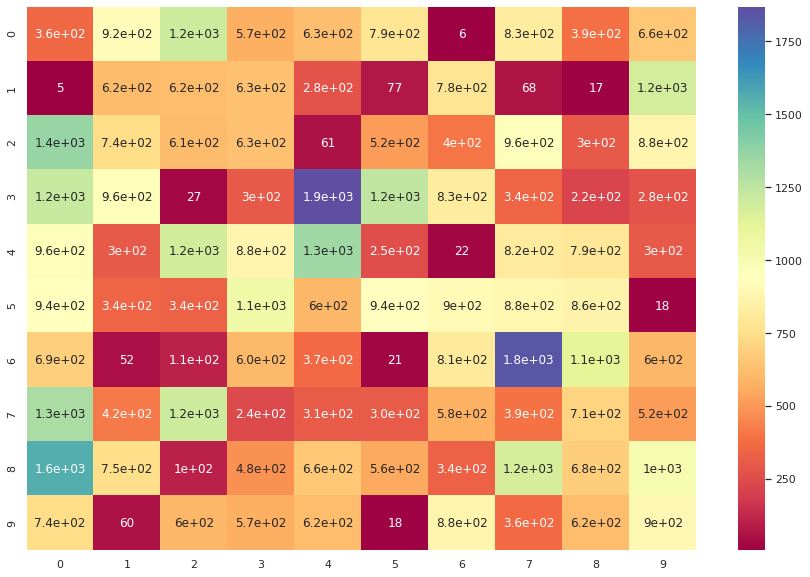

In [ ]:
#preparo los datos de entrada a la funcion
cant_datos = 300
datos_= datos_totales.drop(['sex','tvdlm'], axis=1).sample(n=cant_datos)
aux = datos_['sigdz']
datos = datos_.drop(['sigdz'], axis=1)
datos = (datos - datos.mean())/datos.std()#normalizo los datos
datos['sigdz'] = aux
size_test1= 0.3
testk,traink = train_test_split(datos, train_size = size_test1, random_state = 2) 

k = 10
w,clasificacion = redes_kohonen(traink,k,cte=100)

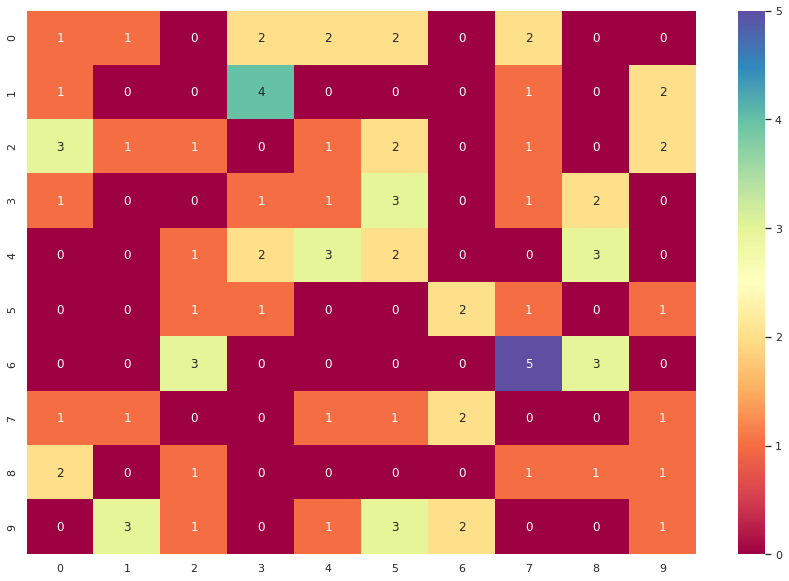

In [ ]:
head = ['No enfermo','Enfermo']
tabla_clasificacion,matriz_confusion = clasificar_redes_kohonen(testk,w,clasificacion,head)

In [ ]:
tabla_clasificacion

,age,cad.dur,choleste,sigdz,clase predicha,probabilidad predicha
2265,0.572511,-0.682369,-0.373671,1,1,0.739518
802,0.472596,0.761013,1.096044,0,1,0.706167
2668,0.372681,-0.682369,-0.302556,1,1,0.739518
2502,1.971315,-0.718008,-0.539607,1,1,0.901763
2359,-0.426635,-0.415076,-1.321874,1,0,0.992095
...,...,...,...,...,...,...
296,0.972169,2.863718,0.171546,1,1,0.893855
3002,-1.825440,-0.628911,-0.539607,0,1,0.758010
710,1.671571,5.126799,-0.539607,1,1,0.673937
373,0.872255,-0.415076,-0.065505,1,1,1.000000


In [ ]:
matriz_confusion

,No enfermo,Enfermo
No enfermo,4,24
Enfermo,8,54


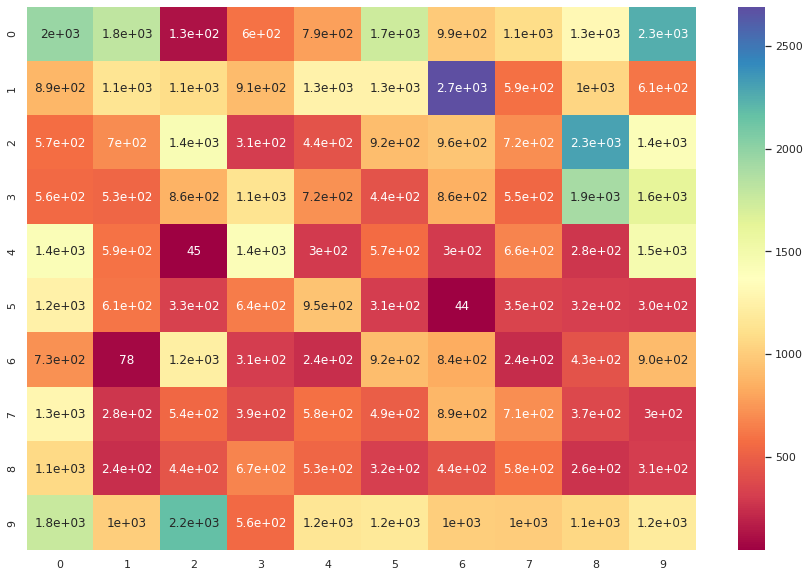

In [ ]:
#preparo los datos de entrada a la funcion
cant_datos = 400
datos_= datos_totales.drop(['sex','tvdlm'], axis=1).sample(n=cant_datos)
aux = datos_['sigdz']
datos = datos_.drop(['sigdz'], axis=1)
datos = (datos - datos.mean())/datos.std()#normalizo los datos
datos['sigdz'] = aux
size_test1= 0.3
testk,traink = train_test_split(datos, train_size = size_test1, random_state = 2) 

k = 10
w,clasificacion = redes_kohonen(traink,k,cte)